In [22]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [23]:
train_labels = []
train_samples = []
test_labels = []
test_samples = []

In [24]:
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The ~95% of older individuals who did experience side effects
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)


for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The 5% of older individuals who did not experience side effects
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The 95% of older individuals who did experience side effects
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)


In [25]:
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)
test_samples = np.array(test_samples)
test_labels = np.array(test_labels)


In [26]:
train_samples, train_labels = shuffle(train_samples, train_labels)
test_samples, test_labels = shuffle(test_samples, test_labels)

In [27]:
scaler = MinMaxScaler(feature_range=(0,1))

In [28]:
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [33]:
model = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(
    optimizer = Adam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(scaled_train_samples, train_labels, batch_size=10, epochs=30, verbose=2)

Epoch 1/30
210/210 - 1s - loss: 0.5354 - accuracy: 0.7643 - 1s/epoch - 5ms/step
Epoch 2/30
210/210 - 1s - loss: 0.3129 - accuracy: 0.9143 - 681ms/epoch - 3ms/step
Epoch 3/30
210/210 - 1s - loss: 0.2667 - accuracy: 0.9343 - 635ms/epoch - 3ms/step
Epoch 4/30
210/210 - 1s - loss: 0.2540 - accuracy: 0.9371 - 647ms/epoch - 3ms/step
Epoch 5/30
210/210 - 1s - loss: 0.2465 - accuracy: 0.9419 - 723ms/epoch - 3ms/step
Epoch 6/30
210/210 - 1s - loss: 0.2423 - accuracy: 0.9424 - 718ms/epoch - 3ms/step
Epoch 7/30
210/210 - 1s - loss: 0.2388 - accuracy: 0.9386 - 680ms/epoch - 3ms/step
Epoch 8/30
210/210 - 1s - loss: 0.2351 - accuracy: 0.9429 - 623ms/epoch - 3ms/step
Epoch 9/30
210/210 - 1s - loss: 0.2342 - accuracy: 0.9452 - 622ms/epoch - 3ms/step
Epoch 10/30
210/210 - 1s - loss: 0.2320 - accuracy: 0.9429 - 643ms/epoch - 3ms/step
Epoch 11/30
210/210 - 1s - loss: 0.2310 - accuracy: 0.9424 - 648ms/epoch - 3ms/step
Epoch 12/30
210/210 - 1s - loss: 0.2305 - accuracy: 0.9433 - 677ms/epoch - 3ms/step
Epoc

In [34]:
model.evaluate(scaled_test_samples, test_labels, batch_size=10, verbose=2)

42/42 - 0s - loss: 0.2389 - accuracy: 0.9524 - 278ms/epoch - 7ms/step


[0.23889224231243134, 0.9523809552192688]

In [38]:
model_predictions = model.predict(scaled_test_samples, batch_size=10, verbose=2)
model_predictions[:5]

42/42 - 0s - 106ms/epoch - 3ms/step


array([[0.9593875 , 0.04061244],
       [0.03640051, 0.9635995 ],
       [0.9621297 , 0.03787028],
       [0.4474197 , 0.5525803 ],
       [0.96072423, 0.03927569]], dtype=float32)

In [42]:
rounded_model_predictions = np.argmax(model_predictions, axis=1)
rounded_model_predictions[:5]

array([0, 1, 0, 1, 0], dtype=int64)

In [43]:
test_labels[:5]

array([0, 1, 0, 1, 0])

In [45]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix, classification_report

In [46]:
print(classification_report(test_labels, rounded_model_predictions))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       210
           1       0.95      0.95      0.95       210

    accuracy                           0.95       420
   macro avg       0.95      0.95      0.95       420
weighted avg       0.95      0.95      0.95       420



In [47]:
cm = confusion_matrix(test_labels, rounded_model_predictions)

In [48]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [49]:
plot_labels = ['no side effects', 'had side effects']

Confusion matrix, without normalization
[[200  10]
 [ 10 200]]


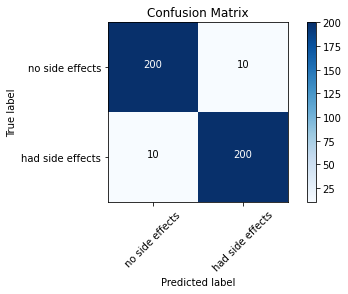

In [50]:
plot_confusion_matrix(cm, plot_labels, title='Confusion Matrix')